In [1]:
## "importing software libraries"
import numpy as np
import torch
from torch.autograd import Variable

In [2]:
## that's just a funny way of how retrieving the test data
!wget http://www.hephy.at/user/wwaltenberger/data.p

--2020-02-10 16:12:18--  http://www.hephy.at/user/wwaltenberger/data.p
Resolving www.hephy.at (www.hephy.at)... 193.170.243.198
Connecting to www.hephy.at (www.hephy.at)|193.170.243.198|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1582 (1.5K) [text/x-pascal]
Saving to: ‘data.p.2’

data.p.2            100%[===================>]   1.54K  --.-KB/s    in 0s      

2020-02-10 16:12:18 (250 MB/s) - ‘data.p.2’ saved [1582/1582]



In [3]:
## now we have lots of data in "x_data", the truth is stored in "y_data"
x_data, y_data = torch.load ( "data.p" )

In [4]:
## This is the "class" where the neural network is defined

class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        ## a linear layer, we have two neurons as input, one as output
        self.linear = torch.nn.Linear(2, 1) # 2 in and 1 out
        ### Here you can try to add a layer, and learn a better decision boundary!!!!
        
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

In [5]:
# we have to instantiate the class, create an object
model = Model()

In [6]:
# here we define our loss function ...
criterion = torch.nn.BCELoss(reduction="mean")
# .... and our gradient descent method!
adam = torch.optim.Adam(model.parameters(), lr=0.001)

In [7]:
# Training loop
for epoch in range(1000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x_data)
    
    # Compute and print loss
    loss = criterion(y_pred, y_data)
    # print(epoch, loss_adam.data, loss_sgd.data)
    
    # Zero gradients, perform a backward pass, and update the weights.
    adam.zero_grad()
    loss.backward()
    adam.step()

In [8]:
## The rest of the code is just plotting!
w_adam = list(model.parameters())
w_adam0, w_adam1 = w_adam[0].data.numpy(), w_adam[1].data.numpy()

In [9]:
## import the plotting library
import matplotlib.pyplot as plt

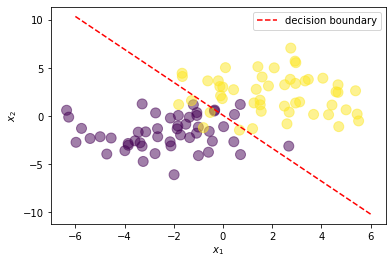

In [11]:
# and plot the data and the decision boundary!
plt.scatter(x_data[:,0], x_data[:,1], c=y_data.reshape(100), s=100, alpha=0.5)
x_axis = np.linspace(-6, 6, 100)
y_axis = -(w_adam1[0] + x_axis*w_adam0[0][0]) / w_adam0[0][1]
line_up, = plt.plot(x_axis, y_axis,'r--', label='decision boundary')
plt.legend(handles=[line_up])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.savefig ( "example.png" )

In [12]:
## we compute the "accuracy" of the model, i.e. the number of correctly labeled points
## divided by the total number

correct, total = 0, len(x_data)                                                       
for data, label in zip ( x_data, y_data ):                                            
    output = model(data)                                                              
    predicted = int(output.data[0] > .5)                                              
    label = int ( label )                                                             
    correct += (predicted == label)                                                   
                                                                                      
print('Accuracy of the model on the %d test points: %.2f %%' % ( total, 100. * correct / total)) 

Accuracy of the model on the 100 test points: 92.00 %
